In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


In [3]:
import keras

Using TensorFlow backend.


In [22]:
from keras.datasets import mnist

In [23]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
image_one = X_train[0]

In [27]:
image_one

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

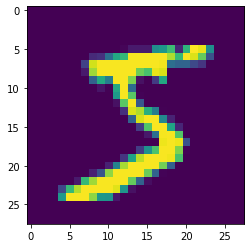

In [28]:
plt.imshow(image_one)

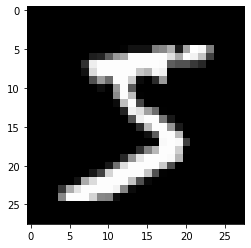

In [29]:
plt.imshow(image_one,cmap='gray')

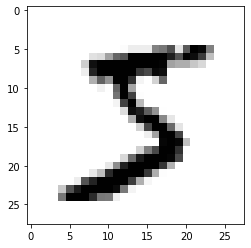

In [30]:
plt.imshow(image_one,cmap='gray_r')

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
y_train.shape

(60000,)

In [33]:
from keras.utils.np_utils import to_categorical

In [34]:
y_train_cat = to_categorical(y_train,10)

In [35]:
y_train[0]

5

In [36]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [37]:
y_train.shape,y_train_cat.shape

((60000,), (60000, 10))

In [38]:
y_test.shape

(10000,)

In [39]:
y_test_cat = to_categorical(y_test,10)

In [40]:
y_test[1]

2

In [50]:
y_test_cat[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Scaling of Data

In [42]:
X_train.max()

255

In [43]:
image_one.max()

255

In [44]:
X_train = X_train/X_train.max()

In [45]:
X_test = X_test/255

In [46]:
X_train.max()

1.0

In [47]:
image_scaled = X_train[1]

In [48]:
image_scaled.max()

1.0

In [49]:
image_scaled

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

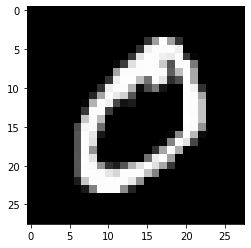

In [51]:
plt.imshow(image_scaled,cmap='gray')

In [52]:
X_train.shape

(60000, 28, 28)

### In the shape of our training data, there is no color channel.

## We now need to add COLOR-CHANNEL in the shape of our training data

In [53]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [54]:
X_test.shape, X_train.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

# Building Model

In [55]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [56]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train_cat,epochs=8)

Epoch 1/8
60000/60000 [==============================] - 57s 942us/step - loss: 0.0353 - accuracy: 0.9900s - loss: 0.0354 - accuracy: 0.
Epoch 2/8
60000/60000 [==============================] - 57s 957us/step - loss: 0.0278 - accuracy: 0.9920
Epoch 3/8
60000/60000 [==============================] - 56s 937us/step - loss: 0.0214 - accuracy: 0.9937s - loss: 0.0215 - 
Epoch 4/8
60000/60000 [==============================] - 58s 973us/step - loss: 0.0178 - accuracy: 0.9950s - loss: 0.0176 - accura
Epoch 5/8
60000/60000 [==============================] - 58s 963us/step - loss: 0.0142 - accuracy: 0.9961s - loss: 0 - ETA: 0s - loss: 0
Epoch 6/8
60000/60000 [==============================] - 57s 958us/step - loss: 0.0112 - accuracy: 0.9969
Epoch 7/8
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0088 - accuracy: 0.9975
Epoch 8/8
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0079 - accuracy: 0.9977


In [60]:
model.metrics_names

['loss', 'accuracy']

In [61]:
model.evaluate(X_test,y_test_cat)

10000/10000 [==============================] - 3s 258us/step


[0.06108605577847659, 0.9876999855041504]

In [62]:
from sklearn.metrics import classification_report

In [63]:
prediction = model.predict_classes(X_test)

In [64]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [65]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

